In [1]:
import sqlite3
import numpy as np
import comet_ml
# load the database path
from config import settings
from pathlib import Path

settings_proc ='SETTINGS1'
settings_simu = 'SETTINGS1'
root= Path(settings.data.path["processed"])
database_path = (root /settings_simu/settings_simu.lower()).with_suffix('.db')

TypeError: field() got an unexpected keyword argument 'alias'

In [ ]:
database_path

PosixPath('/home/yacine/Documents/PhD/Code/GitProject/PBSHM_mdof/data/processed/SETTINGS1/settings1.db')

In [ ]:
from psm.utils.data.metadata import get_metadata_processed
metadata= get_metadata_processed(settings_proc, settings_simu)
freq_axis = metadata['freq']

In [ ]:
from psm.models.prepare_data import CreateTransformer,PSDDataModule,PSDDataset
# let's create the transformer
transformer = CreateTransformer(database_path, freq=freq_axis, freq_min=0, freq_max=150)
transform_psd = transformer.transform_psd
transform_label = transformer.transform_label
input_dim = transformer.dimension_psd()
dm = PSDDataModule(database_path, transform_psd, transform_label, batch_size=32)
dm.setup()

# Create dataloaders
train_dl = dm.train_dataloader()
val_dl = dm.val_dataloader()
test_dl = dm.test_dataloader()

# Print some details
print(f"Number of training samples: {len(dm.train_dataset)}")
print(f"Number of validation samples: {len(dm.val_dataset)}")
print(f"Number of test samples: {len(dm.test_dataset)}")

# Get a batch of data
for batch in train_dl:
    data, label = batch
    print(f"Shape of data from train_dl: {data.shape}")
    print(f"Shape of label from train_dl: {label.shape}")
    break

(anomaly_level=?) AND stage=? (0, 'train')
(anomaly_level=?) AND stage=? (0, 'test')
Number of training samples: 16000
Number of validation samples: 4000
Number of test samples: 4000
Shape of data from train_dl: torch.Size([32, 385])
Shape of label from train_dl: torch.Size([32])


In [ ]:
from psm.models.prepare_data import PSDNotchDataset , PSDNotchDatasetOriginal
database_notch_path = (root/settings_simu/(settings_proc.lower()+"_vas")).with_suffix('.db')

anomaly_dl = PSDDataset(database_path, transform=transform_psd, transform_label=transform_label, stage='anomaly')
test_dl = PSDDataset(database_path, transform=transform_psd, transform_label=transform_label, stage='test')


psd_notch = PSDNotchDataset(database_notch_path, transform=transform_psd, transform_label=transform_label)
psd_original = PSDNotchDatasetOriginal(database_notch_path,transform=transform_psd, transform_label=transform_label)


stage=? ('anomaly',)
stage=? ('test',)
system_name LIKE ? ('%',)
system_name LIKE ? ('%',)


In [ ]:
%load_ext autoreload
%autoreload 2

CometLogger will be initialized in online mode
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/yacinebelhadj/psm-mdof1/33536c12fff344a5abfeaed113b0c274



(anomaly_level=?) AND stage=? (0, 'train')
(anomaly_level=?) AND stage=? (0, 'test')


/home/yacine/miniconda3/envs/PBSHM_Mdof/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:615: UserWarning: Checkpoint directory /home/yacine/Documents/PhD/Code/GitProject/PBSHM_mdof/model/model exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")

  | Name      | Type                  | Params
----------------------------------------------------
0 | model     | DenseSignalClassifier | 431 K 
1 | criterion | CrossEntropyLoss      | 0     
2 | train_acc | MulticlassAccuracy    | 0     
3 | val_acc   | MulticlassAccuracy    | 0     
4 | test_acc  | MulticlassAccuracy    | 0     
----------------------------------------------------
431 K     Trainable params
0         Non-trainable params
431 K     Total params
1.728     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

/home/yacine/miniconda3/envs/PBSHM_Mdof/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:432: PossibleUserWarning: The dataloader, val_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


validation acc 0.09375


/home/yacine/miniconda3/envs/PBSHM_Mdof/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:432: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

COMET WARNING: Error exporting current conda environment


Validation: 0it [00:00, ?it/s]

validation acc 0.7527412176132202


Validation: 0it [00:00, ?it/s]

validation acc 0.7761331796646118


Validation: 0it [00:00, ?it/s]

validation acc 0.7931872606277466


Validation: 0it [00:00, ?it/s]

validation acc 0.8084782361984253


Validation: 0it [00:00, ?it/s]

validation acc 0.815987765789032


Validation: 0it [00:00, ?it/s]

validation acc 0.8199793696403503


Validation: 0it [00:00, ?it/s]

validation acc 0.8180331587791443


Validation: 0it [00:00, ?it/s]

validation acc 0.8175667524337769


Validation: 0it [00:00, ?it/s]

validation acc 0.8184090256690979


Validation: 0it [00:00, ?it/s]

validation acc 0.8202974796295166


Validation: 0it [00:00, ?it/s]

validation acc 0.8247373700141907


Validation: 0it [00:00, ?it/s]

validation acc 0.8247634172439575


Validation: 0it [00:00, ?it/s]

validation acc 0.8317875862121582


Validation: 0it [00:00, ?it/s]

validation acc 0.8336058855056763


Validation: 0it [00:00, ?it/s]

validation acc 0.8337421417236328


Validation: 0it [00:00, ?it/s]

validation acc 0.8387166261672974


Validation: 0it [00:00, ?it/s]

validation acc 0.8388979434967041


Validation: 0it [00:00, ?it/s]

validation acc 0.8427890539169312


Validation: 0it [00:00, ?it/s]

validation acc 0.8418397903442383


Validation: 0it [00:00, ?it/s]

validation acc 0.8446623682975769


Validation: 0it [00:00, ?it/s]

validation acc 0.8454045057296753


Validation: 0it [00:00, ?it/s]

validation acc 0.8469858765602112


Validation: 0it [00:00, ?it/s]

validation acc 0.8491036295890808


Validation: 0it [00:00, ?it/s]

validation acc 0.8543298244476318


Validation: 0it [00:00, ?it/s]

validation acc 0.8555164933204651


Validation: 0it [00:00, ?it/s]

validation acc 0.8569329977035522


Validation: 0it [00:00, ?it/s]

validation acc 0.8582649230957031


Validation: 0it [00:00, ?it/s]

validation acc 0.8600410223007202


Validation: 0it [00:00, ?it/s]

validation acc 0.8585017919540405


Validation: 0it [00:00, ?it/s]

validation acc 0.8597166538238525


Validation: 0it [00:00, ?it/s]

validation acc 0.8620884418487549


Validation: 0it [00:00, ?it/s]

validation acc 0.863523006439209


Validation: 0it [00:00, ?it/s]

validation acc 0.8642858862876892


Validation: 0it [00:00, ?it/s]

validation acc 0.8667169809341431


Validation: 0it [00:00, ?it/s]

validation acc 0.8671292662620544


Validation: 0it [00:00, ?it/s]

validation acc 0.870785117149353


Validation: 0it [00:00, ?it/s]

validation acc 0.8742541074752808


Validation: 0it [00:00, ?it/s]

validation acc 0.8775392770767212


Validation: 0it [00:00, ?it/s]

validation acc 0.8806610703468323


Validation: 0it [00:00, ?it/s]

validation acc 0.8836318254470825


Validation: 0it [00:00, ?it/s]

validation acc 0.8864405751228333


Validation: 0it [00:00, ?it/s]

validation acc 0.8891286849975586


Validation: 0it [00:00, ?it/s]

validation acc 0.8916894793510437


Validation: 0it [00:00, ?it/s]

validation acc 0.8941304087638855


Validation: 0it [00:00, ?it/s]

validation acc 0.8964762687683105


Validation: 0it [00:00, ?it/s]

validation acc 0.8987070322036743


Validation: 0it [00:00, ?it/s]

validation acc 0.9007971882820129


Validation: 0it [00:00, ?it/s]

validation acc 0.9028460383415222


Validation: 0it [00:00, ?it/s]

validation acc 0.9048113226890564


Validation: 0it [00:00, ?it/s]

validation acc 0.9066979885101318


Validation: 0it [00:00, ?it/s]

validation acc 0.9084949493408203


Validation: 0it [00:00, ?it/s]

validation acc 0.9102420806884766


Validation: 0it [00:00, ?it/s]

validation acc 0.9109817743301392


Validation: 0it [00:00, ?it/s]

validation acc 0.9126255512237549


Validation: 0it [00:00, ?it/s]

validation acc 0.9141950011253357


Validation: 0it [00:00, ?it/s]

validation acc 0.9155815839767456


Validation: 0it [00:00, ?it/s]

validation acc 0.9170520305633545


Validation: 0it [00:00, ?it/s]

validation acc 0.9176295399665833


Validation: 0it [00:00, ?it/s]

validation acc 0.9190086126327515


Validation: 0it [00:00, ?it/s]

validation acc 0.9203500747680664


Validation: 0it [00:00, ?it/s]

validation acc 0.9216434359550476


Validation: 0it [00:00, ?it/s]

validation acc 0.9228967428207397


Validation: 0it [00:00, ?it/s]

validation acc 0.9239006638526917


Validation: 0it [00:00, ?it/s]

validation acc 0.9250795245170593


Validation: 0it [00:00, ?it/s]

validation acc 0.9262190461158752


Validation: 0it [00:00, ?it/s]

validation acc 0.9264475107192993


Validation: 0it [00:00, ?it/s]

validation acc 0.9269079566001892


Validation: 0it [00:00, ?it/s]

validation acc 0.9279717803001404


Validation: 0it [00:00, ?it/s]

validation acc 0.9290105104446411


Validation: 0it [00:00, ?it/s]

validation acc 0.9300146102905273


Validation: 0it [00:00, ?it/s]

validation acc 0.930986225605011


Validation: 0it [00:00, ?it/s]

validation acc 0.9319280385971069


Validation: 0it [00:00, ?it/s]

validation acc 0.9328515529632568


Validation: 0it [00:00, ?it/s]

validation acc 0.9337535500526428


Validation: 0it [00:00, ?it/s]

validation acc 0.9342854619026184


Validation: 0it [00:00, ?it/s]

validation acc 0.9350849986076355


Validation: 0it [00:00, ?it/s]

validation acc 0.9359176158905029


Validation: 0it [00:00, ?it/s]

validation acc 0.9367294907569885


Validation: 0it [00:00, ?it/s]

validation acc 0.9375157952308655


Validation: 0it [00:00, ?it/s]

validation acc 0.9382880926132202


Validation: 0it [00:00, ?it/s]

validation acc 0.9390431642532349


Validation: 0it [00:00, ?it/s]

validation acc 0.9397798180580139


Validation: 0it [00:00, ?it/s]

validation acc 0.9395252466201782


Validation: 0it [00:00, ?it/s]

validation acc 0.9402338266372681


Validation: 0it [00:00, ?it/s]

validation acc 0.9409151673316956


Validation: 0it [00:00, ?it/s]

validation acc 0.94158935546875


Validation: 0it [00:00, ?it/s]

validation acc 0.9421354532241821


Validation: 0it [00:00, ?it/s]

validation acc 0.9425361752510071


Validation: 0it [00:00, ?it/s]

validation acc 0.9431638121604919


Validation: 0it [00:00, ?it/s]

validation acc 0.9437136650085449


Validation: 0it [00:00, ?it/s]

validation acc 0.944037139415741


Validation: 0it [00:00, ?it/s]

validation acc 0.9446280002593994


Validation: 0it [00:00, ?it/s]

validation acc 0.9452137351036072


Validation: 0it [00:00, ?it/s]

validation acc 0.9457922577857971


Validation: 0it [00:00, ?it/s]

validation acc 0.9463602304458618


Validation: 0it [00:00, ?it/s]

validation acc 0.9469178915023804


Validation: 0it [00:00, ?it/s]

validation acc 0.947464108467102


Validation: 0it [00:00, ?it/s]

validation acc 0.9479935169219971


Validation: 0it [00:00, ?it/s]

validation acc 0.948516309261322


Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.


validation acc 0.9490281343460083


COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/yacinebelhadj/psm-mdof1/33536c12fff344a5abfeaed113b0c274
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     loss [5000]             : (3.5687739849090576, 5.015864372253418)
COMET INFO:     lr-Adam [100]           : (2e-05, 0.002)
COMET INFO:     train_acc [100]         : (0.8565000295639038, 0.9999374747276306)
COMET INFO:     train_energy_loss [100] : (3.707329511642456, 3.979383945465088)
COMET INFO:     train_loss [100]        : (3.5705854892730713, 4.068353176116943)
COMET INFO:     val_acc [100]           : (0.050999999046325684, 1.0)
COMET INFO:     val_energy_loss [100]   : (3.322514295578003, 4.024806499481201)
C

(anomaly_level=?) AND stage=? (0, 'train')
(anomaly_level=?) AND stage=? (0, 'test')


/home/yacine/miniconda3/envs/PBSHM_Mdof/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:432: PossibleUserWarning: The dataloader, test_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Testing: 0it [00:00, ?it/s]

torch.Size([4000]) torch.Size([4000])


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃   Runningstage.testing    ┃                           ┃
┃          metric           ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │            1.0            │
│     test_energy_loss      │    3.9928596019744873     │
│         test_loss         │    3.5675551891326904     │
└───────────────────────────┴───────────────────────────┘

COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml ExistingExperiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/yacinebelhadj/psm-mdof1/33536c12fff344a5abfeaed113b0c274
COMET INFO:   Metrics:
COMET INFO:     test_acc         : 1.0
COMET INFO:     test_energy_loss : 3.9928596019744873
COMET INFO:     test_loss        : 3.5675551891326904
COMET INFO:   Others:
COMET INFO:     Created from : pytorch-lightning
COMET INFO:   Parameters:
COMET INFO:     batch_norm   : True
COMET INFO:     bias         : True
COMET INFO:     dense_layers : [512, 248, 248, 128, 64, 32]
COMET INFO:     dropout_rate : 0
COMET INFO:     en_coef      : 0.3
COMET INFO:     input_dim    : 385
COMET INFO:     l1_reg       : 0.0001
COMET INFO:     lr           : 

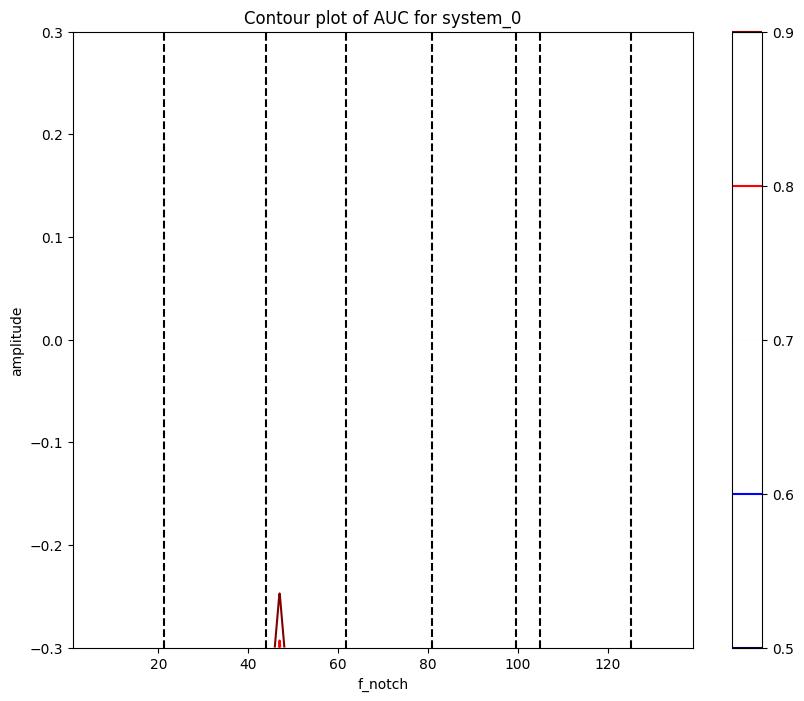

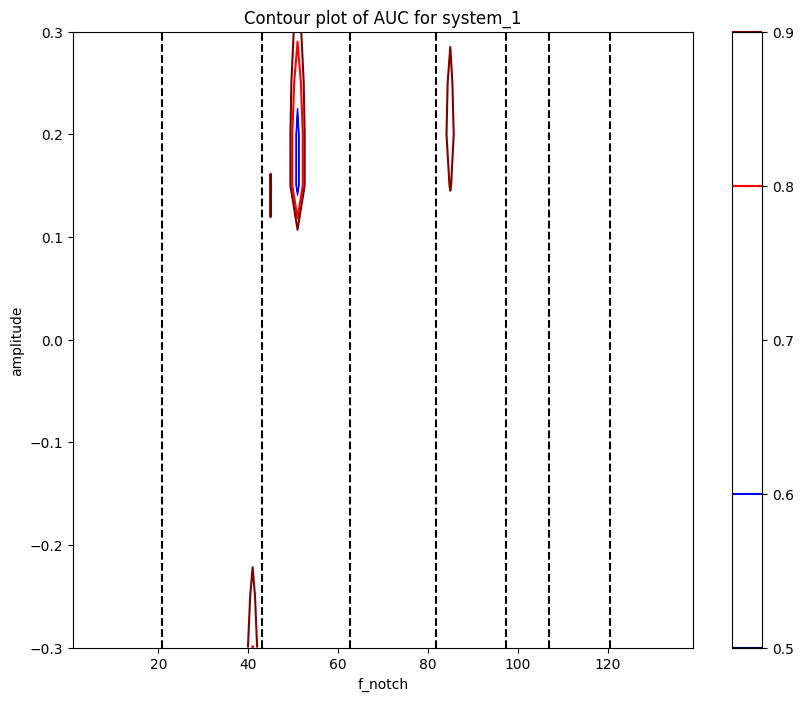

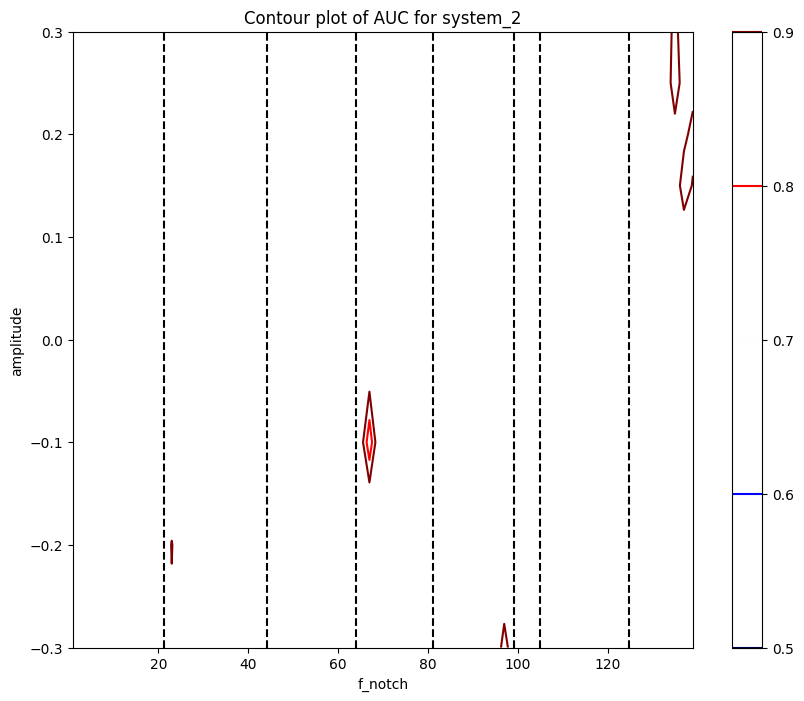

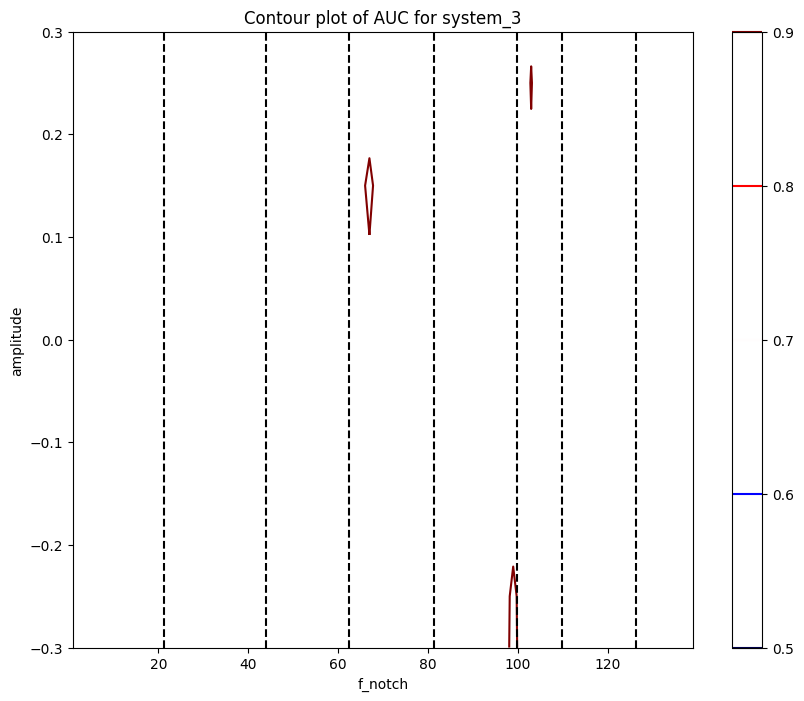

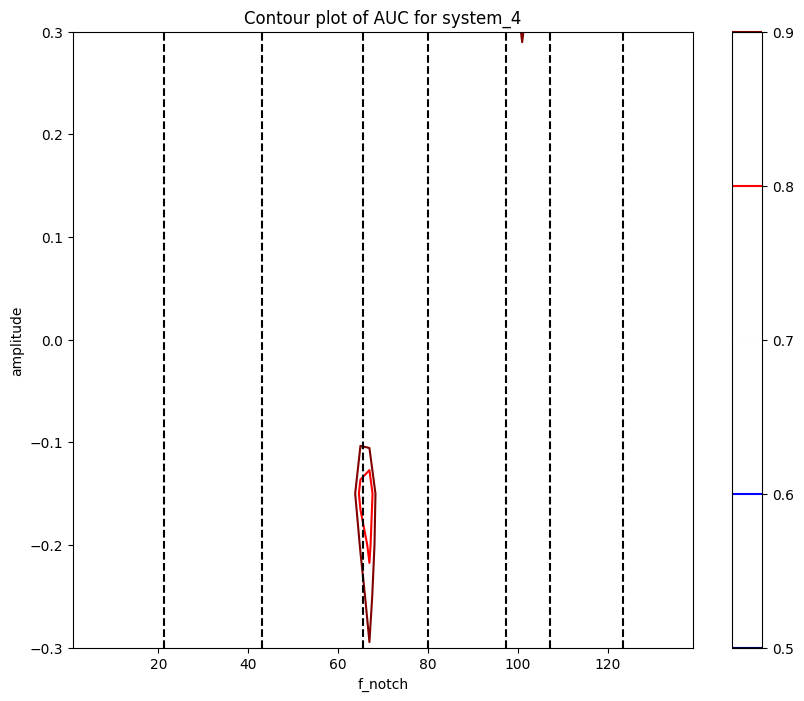

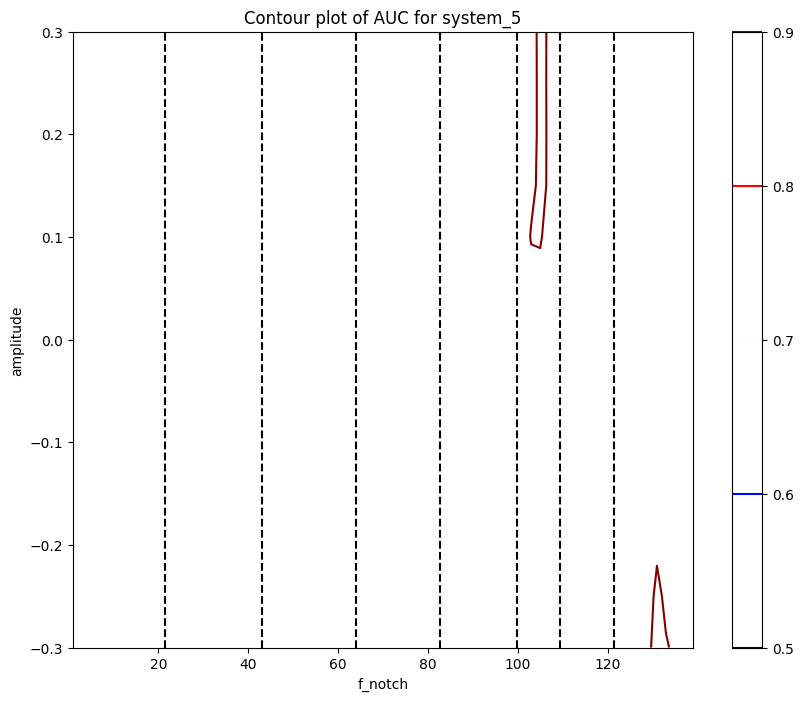

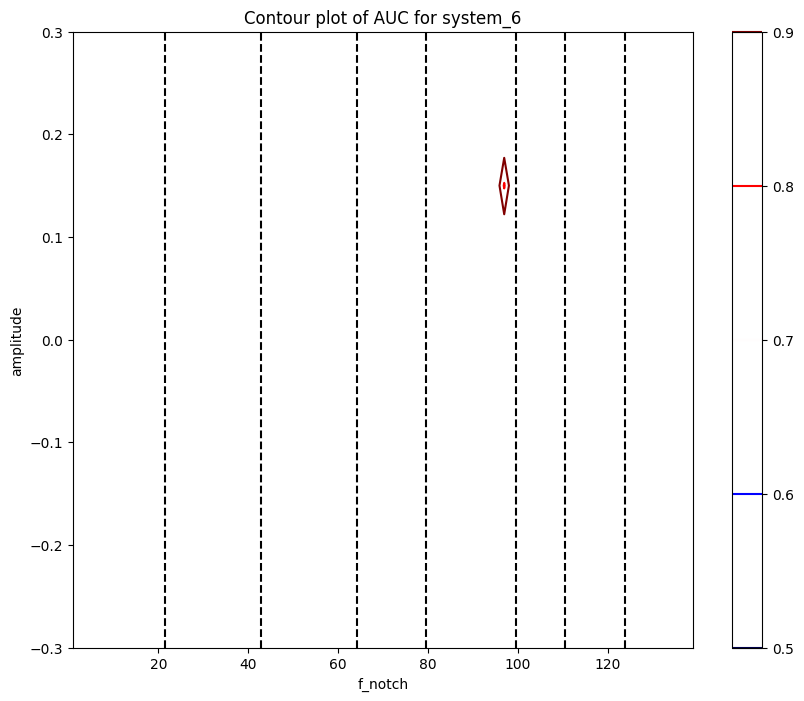

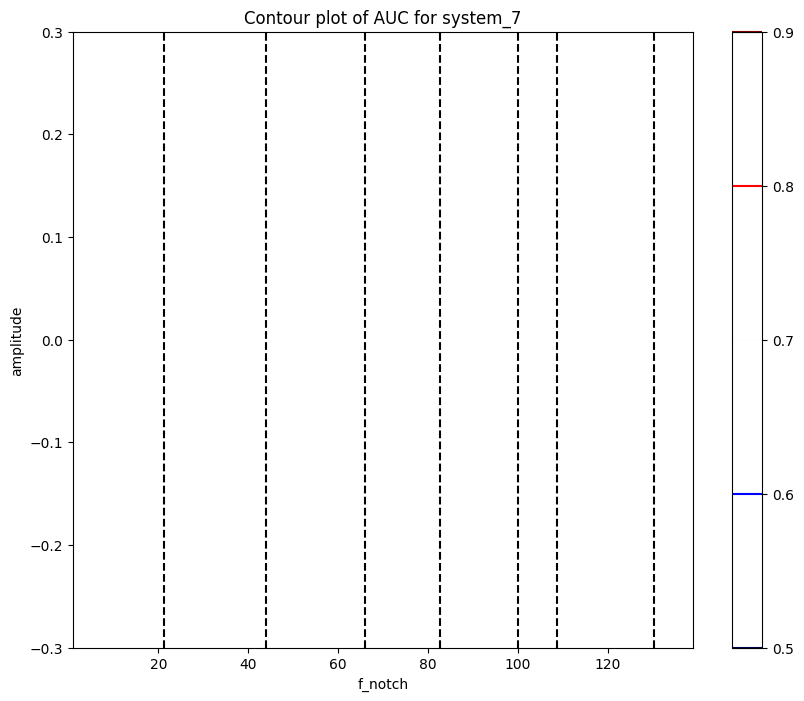

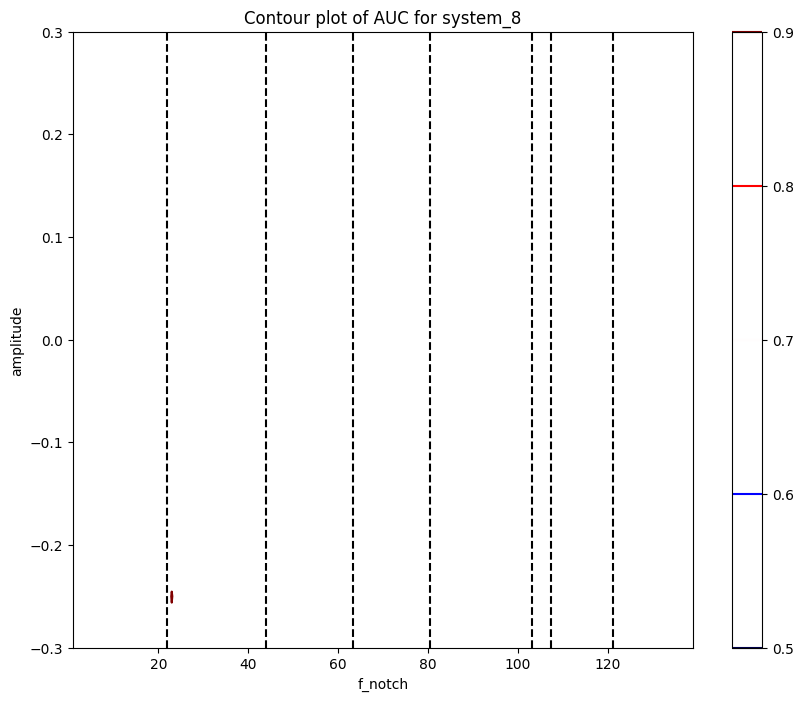

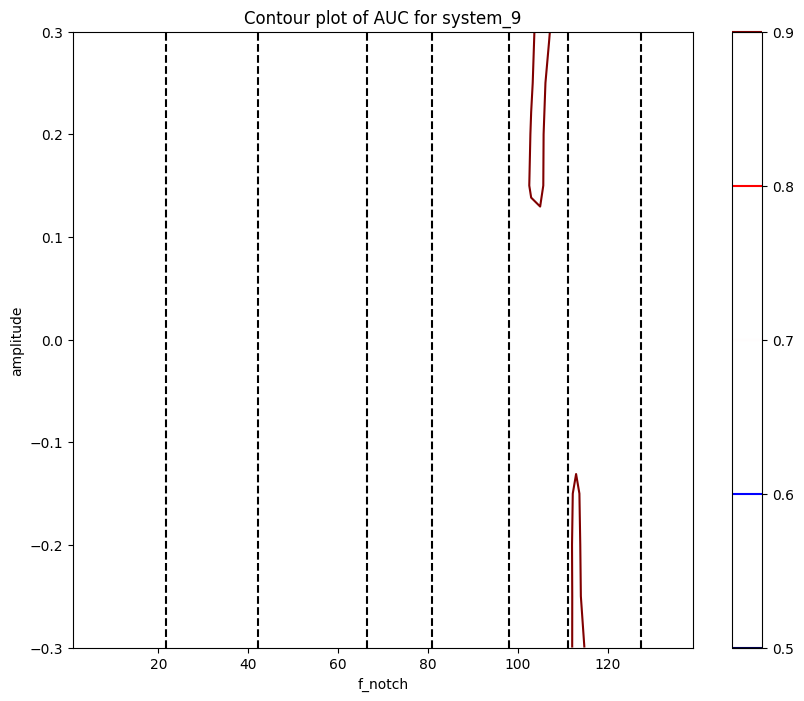

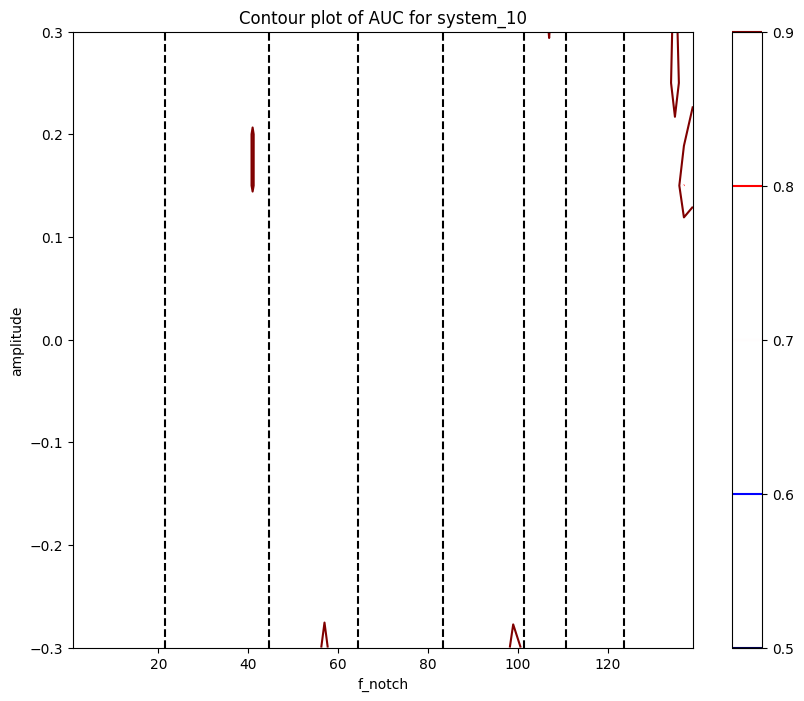

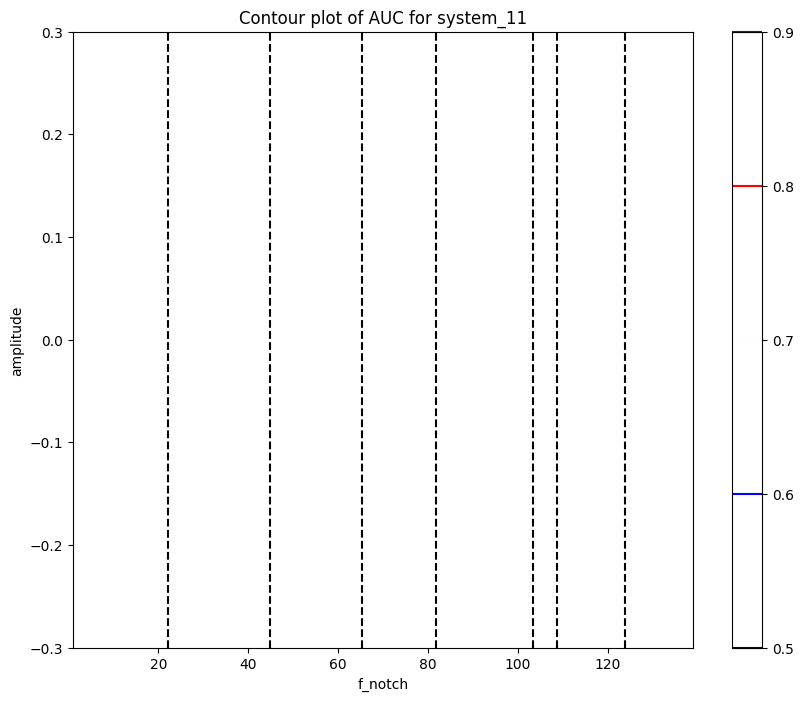

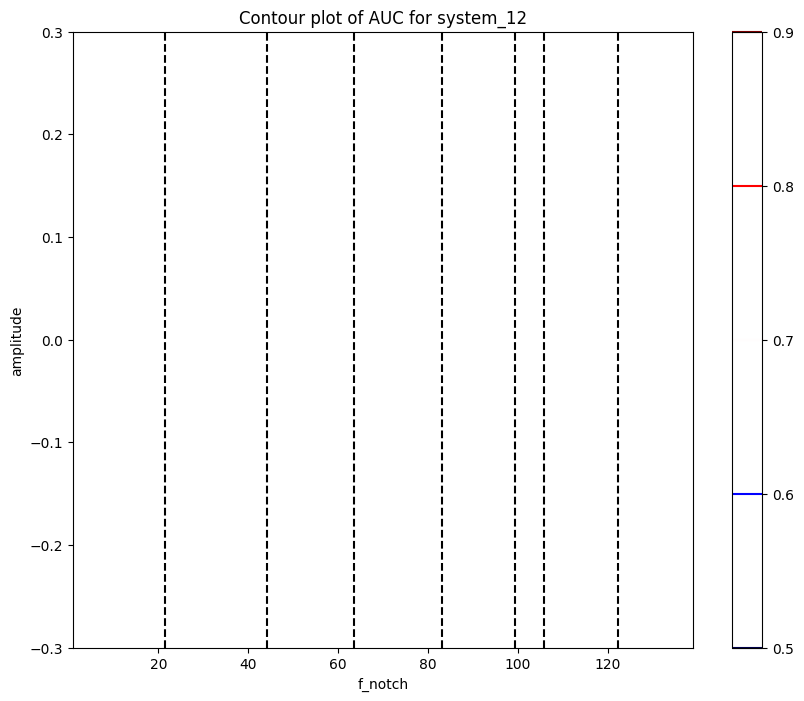

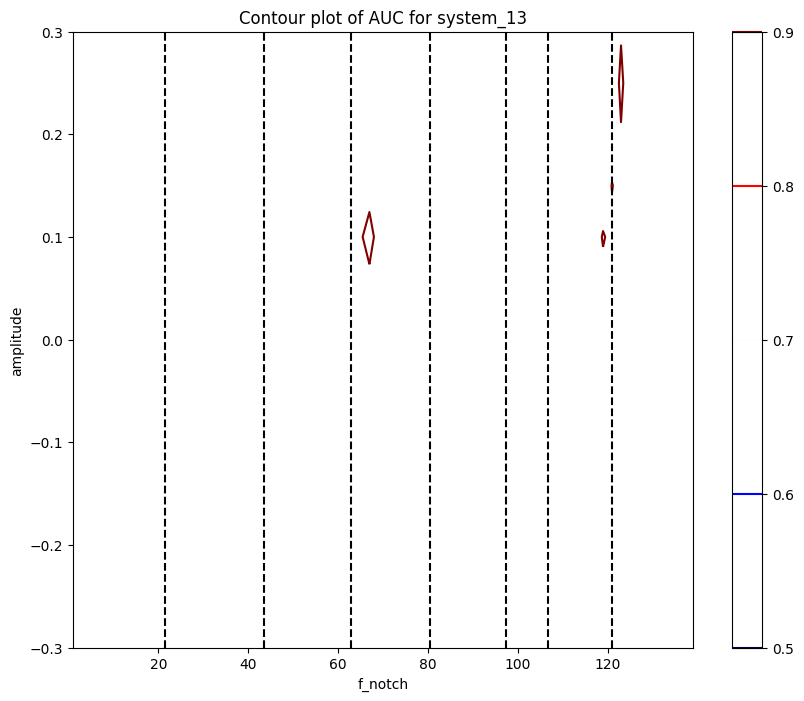

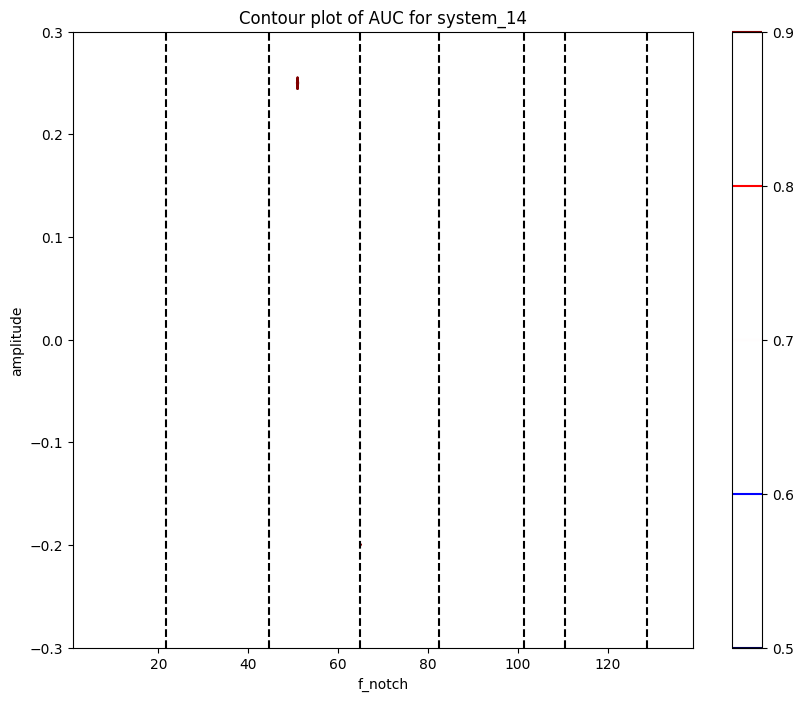

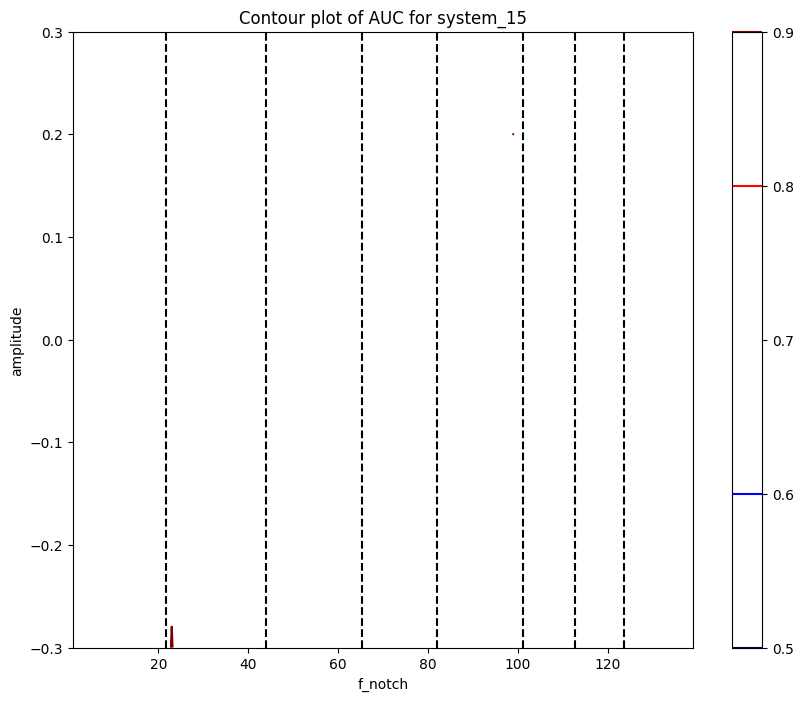

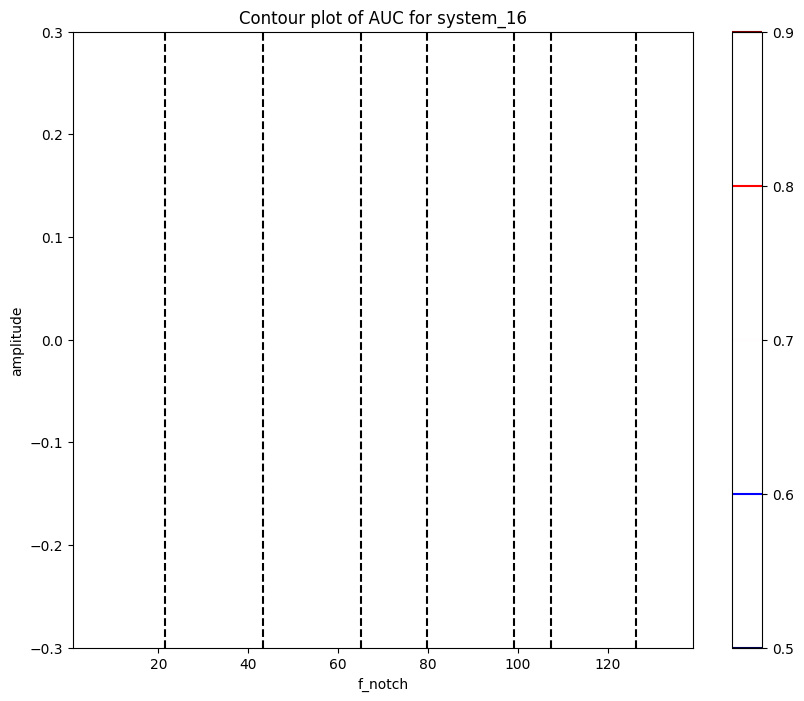

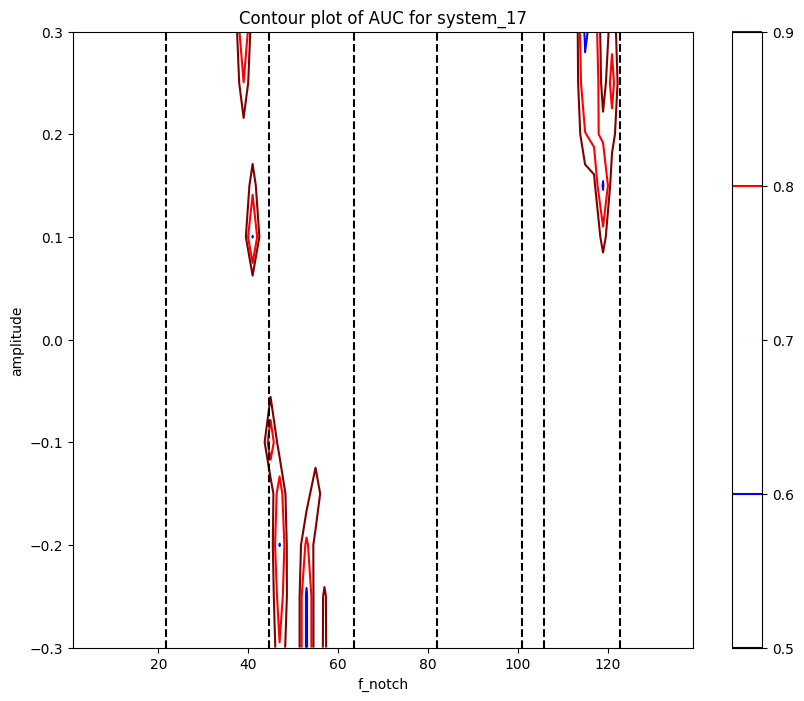

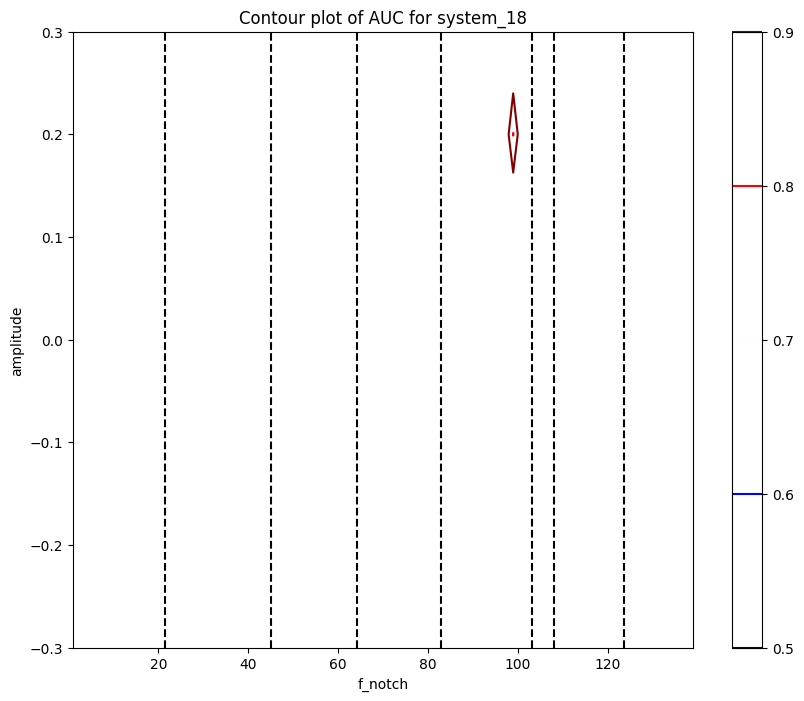

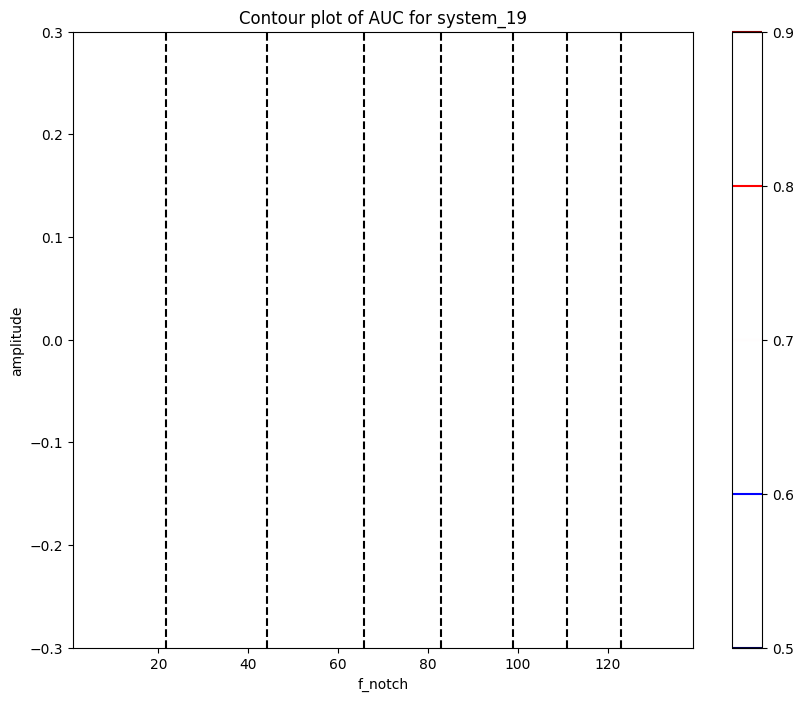

In [ ]:
from psm.models.callbacks_logger import log_metrics 
from psm.models.energy_classification import EnergyDenseSignalClassifierModule 
from psm.models.callbacks_logger import create_callbacks_loggers
from pytorch_lightning import Trainer
from psm.models.ad_systems import AD_energy
from psm.eval.benchmark import Benchmark_SA, Benchmark_VAS
from torch import nn

# create logger and callbacks
callbacks, logger = create_callbacks_loggers()
# hyperparameters
hyper_params = {'input_dim':input_dim,'en_coef':0.3, 'dense_layers':[512,248,248,128, 64, 32],
                'dropout_rate':0, 'num_classes':20, 'lr':0.002,
                'batch_norm':True, 'activation':nn.ReLU(), 'l1_reg':1e-4}
# create model
model = EnergyDenseSignalClassifierModule(**hyper_params)

trainer = Trainer(max_epochs=100, callbacks=callbacks, logger=logger)
trainer.fit(model, dm)

checkpoint_path = trainer.checkpoint_callback.best_model_path
best_model = EnergyDenseSignalClassifierModule.load_from_checkpoint(checkpoint_path)

trainer.test(best_model, dm)
ad_system = AD_energy(model=best_model.model)
ad_system.fit(train_dl)
#ad_system.log_model(logger.experiment)
logger.experiment.log_model("best_model", checkpoint_path)
logger.experiment.log_asset(checkpoint_path,step=trainer.global_step)


# first benchmark
benchmark1= Benchmark_SA(ad_system,anomaly_dl, test_dl, batch_size=10000)
res1 = benchmark1.evaluate()
benchmark2= Benchmark_VAS(ad_system,psd_notch,psd_original,batch_size=10000)
res2 = benchmark2.evaluate_all_systems()
global_metric = log_metrics(logger,res1,res2)

# After training, you can also test your model

logger.experiment.end()